In [119]:
from sklearn.datasets import load_boston
boston, labels = load_boston(return_X_y=True)
print(boston.data.shape)
print(labels.shape)
import numpy as np

(506, 13)
(506,)


In [120]:
#Least squares regression
augment_boston=np.hstack((boston,np.ones((506,1))))
xt=np.transpose(augment_boston)
xtx=np.matmul(xt,augment_boston)
xtx_inverse=np.linalg.inv(xtx)

xty=np.matmul(xt,labels)
w=np.matmul(xtx_inverse,xty)
print(w)
#w is solution to least squares.

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01  3.64911033e+01]


In [121]:
y=np.matmul(augment_boston,w)
print (sum(np.square(y-labels))/506)
#check if accurate

21.897779217687493


In [122]:
fold1 = augment_boston[:101,:]
fold1labels = labels[:101]
print(fold1.shape)
print(fold1labels.shape)

fold2 = augment_boston[101:202,:]
fold2labels = labels[101:202]

fold3 = augment_boston[202:303,:]
fold3labels = labels[202:303]

fold4 = augment_boston[303:404,:]
fold4labels = labels[303:404]

fold5 = augment_boston[404:507,:]
fold5labels = labels[404:507]
print(fold5.shape)
print(fold5labels.shape)

data_folded = [fold1,fold2,fold3,fold4,fold5]
label_folded = [fold1labels,fold2labels,fold3labels,fold4labels,fold5labels]

(101, 14)
(101,)
(102, 14)
(102,)


In [123]:
def cross_validation(split_data, split_labels, k):
    z = np.zeros(k)
    output = [];
    for x in range(k):
        test_data = split_data[x]
        test_labels = split_labels[x] 
        training_data = np.concatenate(np.delete(split_data, x,0),axis=0)
        training_labels = np.concatenate(np.delete(split_labels, x,0),axis=0)
        
        xt=np.transpose(training_data)
        xtx=np.matmul(xt,training_data)
        xtx_inverse=np.linalg.inv(xtx)

        xty=np.matmul(xt,training_labels)
        w_pred=np.matmul(xtx_inverse,xty)
        y_pred=np.matmul(test_data,w_pred)
        
        output = np.concatenate((output,y_pred))
        z = np.square(y_pred-test_labels)
        mean=np.sum(z)/z.size
    return mean,output

In [124]:
mean,predicted = cross_validation(data_folded,label_folded,5)
print("Average Prediction Error:",mean)

Average Prediction Error: 33.07562649223572


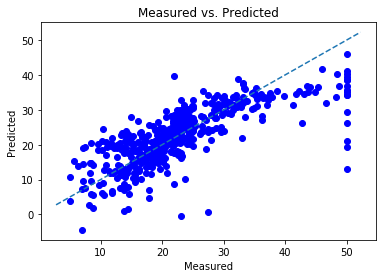

In [125]:
from matplotlib import pyplot as plt
plt.plot(labels,predicted,'bo')

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.title('Measured vs. Predicted')
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    
abline(1,0)

In [126]:
#Ridge regression
augment_boston=np.hstack((boston,np.ones((506,1))))
xt=np.transpose(augment_boston)
xtx=np.matmul(xt,augment_boston)
lamda=2 #lamda can vary
xtxlamdaI=xtx+lamda*np.eye(14)
xtxlamdaI_inverse=np.linalg.inv(xtxlamdaI)

xty=np.matmul(xt,labels)
w_rr=np.matmul(xtxlamdaI_inverse,xty)
print(w_rr)
#w_rr is solution to ridge regression.

[-9.50932941e-02  4.88250703e-02 -1.43064752e-02  2.59714746e+00
 -3.55672545e+00  5.14770969e+00 -7.92102099e-03 -1.08157860e+00
  2.10091174e-01 -1.09104247e-02 -5.44502363e-01  1.32238546e-02
 -4.65267397e-01  1.01956762e+01]


In [127]:
def cross_val_ridge(split_data, split_labels, k,lamda):
    #z = np.zeros(k)
    output = [];
    for x in range(k):
        test_data = split_data[x]
        test_labels = split_labels[x] 
        training_data = np.concatenate(np.delete(split_data, x,0),axis=0)
        training_labels = np.concatenate(np.delete(split_labels, x,0),axis=0)
        
        xt=np.transpose(training_data)
        xtx=np.matmul(xt,training_data)
        xtxlamdaI=xtx+lamda*np.eye(14)
        xtxlamdaI_inverse=np.linalg.inv(xtxlamdaI)

        xty=np.matmul(xt,training_labels)
        w_rr_pred=np.matmul(xtxlamdaI_inverse,xty)
        y_pred=np.matmul(test_data,w_rr_pred)
        
        output = np.concatenate((output,y_pred))
        z = np.square(y_pred-test_labels)
        mean=np.sum(z)/z.size
    return mean,output

In [128]:
newsplitdata = np.delete(data_folded, 0,0) #use 4 folds instead of 5
newsplitlabels = np.delete(label_folded, 0,0)
lamda_val=np.linspace(0,100,101)
lamda_error = np.zeros(lamda_val.size) #error for each lamda value
for i in range(lamda_val.size):
    lamda_error[i] = (cross_val_ridge(newsplitdata,newsplitlabels,4,lamda_val[i]))[0]
bestlam = lamda_val[np.argmin(lamda_error)] 
error = cross_val_ridge(data_folded,label_folded,5,bestlam)[0]

In [129]:
print("Average Prediction Error Ridge Regression",error)

Average Prediction Error Ridge Regression 30.20691402046403
